In [8]:
import requests
import json
from requests.auth import HTTPBasicAuth
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType, BooleanType, StructType, StructField
from pyspark.sql.functions import col, year, month, hour, when, dayofweek, avg, dayofyear
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62642)
Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62642)
Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 929,

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62642)
Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62642)
Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 929,

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62642)
Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62642)
Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 929,

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62642)
Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62642)
Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 929,

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62642)
Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:62642)
Traceback (most recent call last):
  File "C:\Users\duncan.anderson\AppData\Local\Continuum\anaconda3\lib\site-packages\py4j\java_gateway.py", line 929,

In [4]:
spark = SparkSession.builder.getOrCreate()

In [75]:
with open("webinar_config.json") as f:
    config = json.load(f)
print(config["username"])

duncan.anderson@ihsmarkit.com


In [76]:
r3 = requests.get("https://api.connect.ihsmarkit.com/energy/v1/gpe/fastlmp/retrieve/fastlmp_map"\
                  , auth=HTTPBasicAuth(config["username"],config["password"]))

In [77]:
###collect node training data###
resp = requests.get(\
            "https://api.connect.ihsmarkit.com/energy/v1/gpe/fastlmp/retrieve/historical_data?busname=aln_crk_5"\
            , auth=HTTPBasicAuth(config["username"],config["password"]))
#resp2 = requests.get(\
#            "https://api.connect.ihsmarkit.com/energy/v1/gpe/fastlmp/retrieve/forecast_data?busname=aln_crk_5"\
#            , auth=HTTPBasicAuth(config["username"],config["password"]))

In [78]:
resp2.status_code

200

In [79]:
node_json = resp.json()
print(node_json[0])
with open('aln_crk_5.json', 'w') as fout:
    json.dump(node_json , fout)
    
#node_json = resp2.json()
#print(node_json[0])
#with open('aln_crk_5_forecast.json', 'w') as fout:
#    json.dump(node_json , fout)

{'date_hour': '2019-10-03T08:00:00', 'busname': 'ALN_CRK_5', 'zone': 'WEST', 'iso': 'ERCOT', 'zonal_price': 20.22, 'load': 4916.212419122314, 'wind': 4556.4, 'gas': 0.865414559841156, 'lmp_basis': -0.11999999999999744}
{'date_hour': '2024-04-02T05:00:00', 'busname': 'ALN_CRK_5', 'zone': 'WEST', 'iso': 'ERCOT', 'zonal_price': 25.792675018310547, 'load': 4622.830078125, 'wind': 10499.97265625, 'gas': 1.9807322025299072, 'lmp_basis': -39.01993086555733, 'is_outlier': '1'}


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 8 Text xticklabel objects>)

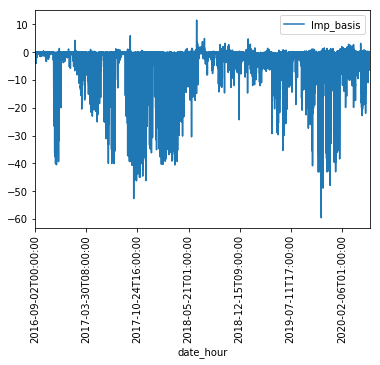

In [24]:
fig1 = node_hist_df.toPandas().plot(kind = "line",x="date_hour",y="lmp_basis")
plt.xticks(rotation=90)

In [60]:
node_hist_df = spark.read.format("json").load("aln_crk_5.json").orderBy("date_hour")

node_hist_df = node_hist_df.withColumn("year",year(col("date_hour")))\
                            .withColumn("month",month(col("date_hour")))\
                            .withColumn("hour",hour(col("date_hour")))\
                            .withColumn("dayofweek",dayofweek(col("date_hour")))\
                            .withColumn("dayofyear",dayofyear(col("date_hour")))
peakdf = spark.read.options(header = True).csv('peak.csv')
#peakdf.show()
node_hist_df = node_hist_df.join(peakdf\
                                 ,peakdf.hr == node_hist_df.hour\
                                 ,how='inner')\
                            .drop('hr')
node_hist_df = node_hist_df.withColumn('peak', when(col("dayofweek") > 5,0).otherwise(node_hist_df.ispeak))

<Figure size 432x288 with 0 Axes>

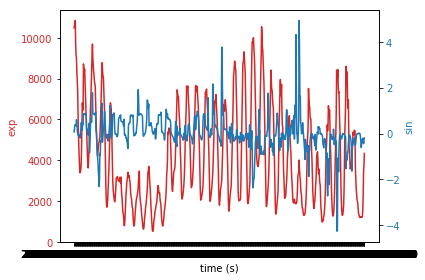

In [26]:
df2018 = node_hist_df.filter(col('year')==2018).filter(col('month') == 7).toPandas()
plt.figure()
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(df2018.date_hour, df2018.wind, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(df2018.date_hour, df2018.lmp_basis, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#plt.plot(kind = "line",x="date_hour",y="lmp_basis")
#plt.subplot("wind")
#plt.show()
#fig2018 = df2018.toPandas().plot(kind = "line",x="date_hour",y=["lmp_basis","wind"])
#plt.xticks(rotation=90)

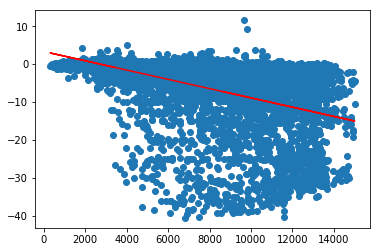

In [18]:
nhdf = node_hist_df.toPandas()
plt.figure()
plt.scatter(y=df2018.lmp_basis, x=df2018.wind)
m, b = np.polyfit(df2018.wind,df2018.lmp_basis, 1)
plt.plot(df2018.wind, m*df2018.wind+b, color = 'red')

In [61]:
validation_df = node_hist_df.filter(((col("year")==2019) & (col("month")>5))|(col("year")==2020))
train_df = node_hist_df.filter((col("year")<2019)|(col("year")==2019) & (col("month")<6))

In [63]:
month_hour_heur = train_df.select('month','hour','lmp_basis').groupBy('month','hour').agg(avg('lmp_basis').alias('mh_avg_basis'))
peak_off_heur = train_df.select('ispeak','lmp_basis').groupBy('ispeak').agg(avg('lmp_basis').alias('peakoff_avg_basis'))
daily_shape_heur = train_df.select('hour','lmp_basis').groupBy('hour').agg(avg('lmp_basis').alias('daily_shape_basis'))
avg_basis_heur = train_df.select('lmp_basis').agg(avg('lmp_basis').alias('avg_lmp_basis'))
monthly_heur = train_df.select('lmp_basis','month').groupBy('month').agg(avg('lmp_basis').alias('monthly_avg_basis'))
last_year_heur = train_df\
                .filter(col('year') == 2019)\
                .withColumnRenamed('lmp_basis','last_year_basis')\
                .select('hour','dayofyear','last_year_basis')
validation_df = validation_df.withColumnRenamed('month','m')\
                            .withColumnRenamed('hour','h')\
                            .withColumnRenamed('ispeak','p')\
                            .withColumnRenamed('dayofyear','doy')
validation_df = validation_df.join(month_hour_heur\
                                 ,(month_hour_heur.hour == validation_df.h)\
                                 &(month_hour_heur.month == validation_df.m)\
                                 ,how='inner')\
                            .drop('month','hour')
validation_df = validation_df.join(peak_off_heur\
                                 ,(peak_off_heur.ispeak == validation_df.p)\
                                 ,how='inner')\
                            .drop('ispeak')
validation_df = validation_df.join(daily_shape_heur\
                                 ,(daily_shape_heur.hour == validation_df.h)\
                                 ,how='inner')\
                            .drop('hour')
validation_df = validation_df.join(monthly_heur\
                                 ,(monthly_heur.month == validation_df.m)\
                                 ,how='inner')\
                            .drop('month')
validation_df = validation_df.join(last_year_heur\
                                  ,(last_year_heur.dayofyear == validation_df.doy)\
                                   &(last_year_heur.hour == validation_df.h))

In [66]:
trimmed_df = validation_df\
            .select('date_hour'\
                    ,'wind'\
                    ,'lmp_basis'\
                    ,'monthly_avg_basis'\
                    ,'daily_shape_basis'\
                    ,'peakoff_avg_basis'\
                    ,'mh_avg_basis'\
                    ,'last_year_basis')\
            .orderBy('date_hour')
trimmed_df.toPandas().to_csv('validation.csv')


In [34]:

heuristics.plot

+------+-------------------+
|ispeak|  peakoff_avg_basis|
+------+-------------------+
|     0| -5.024090171100287|
|     1|-3.4425955294705304|
+------+-------------------+



In [158]:
    EPA_df = EPA_df.join(map_df, 
                          (map_df.am_facility_id_orispl == EPA_df.facility_id_orispl)&
                          (map_df.am_unit_id == EPA_df.unit_id)
                          ,how='inner')\
                          .drop(map_df.am_unit_id&map_df.am_facility_id_orispl)#\
    
    EEratio = CEMS_EIA_gen.withColumn('EPAEIA_ratio'\
                            ,when((col('sum_gen')==0)|(col('sum_net_gen')<0),0).otherwise(CEMS_EIA_gen.sum_net_gen/CEMS_EIA_gen.sum_gen))\
                            .drop(CEMS_EIA_gen.sum_net_gen).drop(CEMS_EIA_gen.sum_gen)
    EPA_monthly = EPA_df.groupBy('facility_id_orispl','year','month')\
                        .agg(sum('GLoad-mw').alias('sum_gen'))
    

NameError: name 'EPA_df' is not defined